In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
device



## Naive Bayes
추론 대상의 사전 확률과 추가적인 정보를 기반으로 해당 대상의 사후 확률을 추론하는 통계적 방법을 베이즈 추정(Bayesian Estimation)이라고 합니다. 

나이브 베이지안은 나이브 베이즈 정리를 활용한 지도 학습 분류 모델입니다. 특정 사건 B가 B1,B2,…,Bn로 분할되고, B가 주어졌을 때 사건 A가 발생할 확률을 다음과 같이 나타낼 수 있습니다.

P(A|B)=P(B|A)⋅P(A)P(B)

위 식에서 B를 임의의 데이터 포인트로, A를 클래스로 생각해보면 임의의 데이터 포인트가 주어졌을 때 특정 클래스로 예측될 확률로 이해할 수 있습니다. 예를 들어, 주어진 이메일이 스팸인지 아닌지를 예측한다고 가정해봅시다. 그러면 P(스팸|이메일) 과 P(not 스팸|이메일) 인 확률을 계산하여 더 높은 값이 나타나는 클래스로 예측할 수 있습니다.

이러한 원리로 나이브 베이즈 모델은 베이즈 정리를 바탕으로 임의의 데이터가 특정 클래스에 속할 확률을 계산합니다. 나이브 베이즈 모델은 주로 텍스트 분류 모델로 자주 활용됩니다. 그런데 왜 나이브 베이즈가 지도 학습 모델에 속하는 것일까요? 베이즈 정리를 활용하여 확률을 계산하기 위해선 먼저 라벨링된 데이터가 필요합니다. 즉, 스팸 필터를 예로 들면 P(스팸) 을 계산해야 하는 것입니다. 이는 전체 이메일 수신함에서 스팸 메일이 무엇인지 일일이 라벨링된 데이터셋을 필요로 합니다.

In [ ]:
''' 
붓꽃 분류문제에 가우시안 나이브 베이즈 모형 적용
1) 각각의 species가 선택될 사전확률 구하기
2) 각 species에 대한 칼럼의 평균, 분산 구하기
3) 분류 문제를 풀고 분류 결과표와 보고서 작성

※가우시안 나이브베이즈 특징
- 연속 데이터에 적용
- 클래스별로 각 특성의 표준편차와 평균 저장
'''
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
## 데이터 셋 마련
iris=load_iris()
x=iris.data
y=iris.target
# print(x,y)

In [ ]:
## 모델 적용
model=GaussianNB().fit(x,y)
print("class_prior_\n",model.class_prior_,"\n")
print("theta_\n",model.theta_,"\n")
print("sigma_\n",model.sigma_,"\n")

In [ ]:
## 예측결과를 confusion_matrix로 나타내기
y_pred=model.predict(x)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))

## 분류 예측 결과 report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

## 베르누이 분포 나이브 베이즈 모형
전자우편과 같은 문서 내에 특정한 단어가 포함되어 있는지의 여부는 베르누이 확률변수로 모형화할 수 있다. 이렇게 독립변수가 0 또는 1의 값을 가지면 베르누이 나이브베이즈 모형을 사용한다.

베르누이분포 나이브베이즈 모형 클래스 BernoulliNB는 가능도 추정과 관련하여 다음 속성을 가진다.

feature_count_: 각 클래스 k에 대해 d번째 동전이 앞면이 나온 횟수 Nd,k

feature_log_prob_: 베르누이분포 모수의 로그

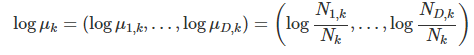

여기에서 Nk은 클래스 k에 대해 동전을 던진 총 횟수이다. 표본 데이터의 수가 적은 경우에는 모수에 대해 다음처럼 스무딩(smoothing)을 할 수도 있다.


## 스무딩

표본 데이터의 수가 적은 경우에는 베르누이 모수가 0 또는 1이라는 극단적인 모수 추정값이 나올 수도 있다. 하지만 현실적으로는 실제 모수값이 이런 극단적인 값이 나올 가능성이 적다. 따라서 베르누이 모수가 0.5인 가장 일반적인 경우를 가정하여 0이 나오는 경우와 1이 나오는 경우, 두 개의 가상 표본 데이터를 추가한다. 그러면 0이나 1과 같은 극단적인 추정값이 0.5에 가까운 다음과 값으로 변한다. 이를 라플라스 스무딩(Laplace smoothing) 또는 애드원(Add-One) 스무딩이라고 한다.

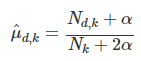

가중치 α를 사용하여 스무딩의 정도를 조절할 수도 있다. 가중치 α는 정수가 아니라도 괜찮다. 가중치가 1인 경우는 무정보 사전확률을 사용한 베이즈 모수추정의 결과와 같다.


[베르누이 바이너리 적용]

※베르누이 분포 특징
- 이진 데이터에 적용
- 복잡도를 조절하는 매개변수가 있음


In [ ]:
'''
1) MNIST 숫자 분류문제에서 Binarizer로 x값을 0, 1로 바꾼다
(값이 8 이상이면 1, 8 미만이면 0). 
즉 흰색과 검은색 픽셀로만 구성된 이미지로 만든다
'''

# 데이터셋
from sklearn.datasets import load_digits
digits=load_digits()
x_dg=digits.data
y_dg=digits.target


# 계산된 모형의 모수 벡터 값을 각 클래스별로 8x8 이미지의 형태로 나타내기
plt.imshow(x_dg[0,:].reshape((8,8)),cmap=plt.cm.binary)
plt.grid(True)

In [ ]:

from sklearn.preprocessing import Binarizer
x_dg=Binarizer(7).fit_transform(x_dg)

print(x_dg)
x_dg.shape

plt.imshow(x_dg[1,:].reshape((8,8)),cmap=plt.cm.binary)
plt.grid(True)

In [ ]:
# 모델 적용
from sklearn.naive_bayes import BernoulliNB
model_dg=BernoulliNB().fit(x_dg, y_dg)
y_dg_pred=model_dg.predict(x_dg)

# 결과 리포팅
print(classification_report(y_dg,y_dg_pred))

In [ ]:
# 모델 적용
'''
bainary=7을 이진 임계값으로 사용하고, 
각각의 포인트는 그것이 위치한 사분면에 의해 특징진다. 
베르누이 naive bayes는 사전 정의된 임계값으로 
정밀하게 분할될 수 있는 이진 특징 벡터나 연속적인 값으로 생각된다.
'''
x_dg=digits.data
model_dg1=BernoulliNB(binarize=7).fit(x_dg, y_dg)
y_dg_pred1=model_dg1.predict(x_dg)

# 결과 리포팅
print(classification_report(y_dg,y_dg_pred1))

In [ ]:
plt.imshow(np.exp(model_dg.feature_log_prob_)[2].reshape((8, 8)), cmap=plt.cm.binary)
plt.grid(True)
plt.show()

## 다항분포 나이브베이즈 모형
다항분포 나이브베이즈 모형 클래스 MultinomialNB는 가능도 추정과 관련하여 다음 속성을 가진다.

feature_count_: 각 클래스 k에서 d번째 면이 나온 횟수 Nd,k

feature_log_prob_: 다항분포의 모수의 로그

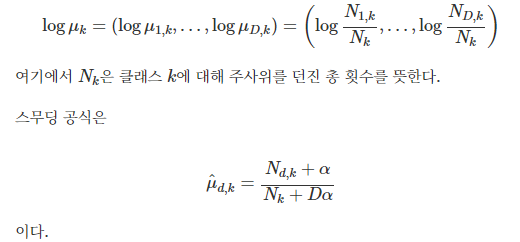

※다항분포 특징
- 카운트 데이터에 적용
- 클래스별로 특성의 평균을 계산
- 복잡도를 조절하는 매개변수 있음

In [ ]:
'''
MNIST 숫자 분류문제를 다항분포 나이브베이즈 모형을 사용하여 풀고 
이진화(Binarizing)를 하여 베르누이 나이브베이즈 모형을 적용했을 경우와 성능을 비교
'''
# 정규분포
x_dg=digits.data
y_dg=digits.target
model_gau=GaussianNB().fit(x_dg,y_dg)
y_gau_pred=model_gau.predict(x_dg)
print(classification_report(y_dg,y_gau_pred))

# 다항분포
from sklearn.naive_bayes import MultinomialNB
model_mul = MultinomialNB().fit(x_dg, y_dg)
model_mul_pred = model_mul.predict(x_dg)

print(classification_report(y_dg, model_mul_pred))

In [ ]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset="all")
X = news.data
y = news.target

from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
# 뉴스그룹 데이터에 대해 나이브베이즈 분류모형을 적용
model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('model', MultinomialNB()),
])
model2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('model', MultinomialNB()),
])
model3 = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('model', MultinomialNB()),
])
model4 = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english",# 불용어 지정
                             token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b"
                             # 텍스트 토큰화 패턴 지정)),
    ('model', MultinomialNB()),
])


In [ ]:
# K-Fold 교차 검정으로 데이터 학습 & 예측
from sklearn.model_selection import cross_val_score, KFold

for i, model in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(model, X, y, cv=5)
    print(("Model{0:d}: Mean score: {1:.3f}").format(i + 1, np.mean(scores)))

In [ ]:
# CountVectorizer?
'''
Convert a collection of text documents to a matrix of token counts
This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.
'''
# TfidfVectorizer?
'''
Convert a collection of raw documents to a matrix of TF-IDF features.
'''
# Pipeline?
'''
Pipeline of transforms with a final estimator.

Sequentially apply a list of transforms and a final estimator.
Intermediate steps of the pipeline must be 'transforms', that is, they
must implement fit and transform methods.
The final estimator only needs to implement fit.
The transformers in the pipeline can be cached using ``memory`` argument.

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters.
For this, it enables setting parameters of the various steps using their
names and the parameter name separated by a '__', as in the example below.
A step's estimator may be replaced entirely by setting the parameter
with its name to another estimator, or a transformer removed by setting
it to 'passthrough' or ``None``.
'''

# cross_val_score?
'''
cross_val_score(estimator, X, y=None, groups=None, 
scoring=None, cv=None, n_jobs=None, verbose=0, 
fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
Docstring:
Evaluate a score by cross-validation

X : array-like
    The data to fit. Can be for example a list, or an array.

y : array-like, optional, default: None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like, with shape (n_samples,), optional
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : string, callable or None, optional, default: None
    A string (see model evaluation documentation) or
    a scorer callable object / function with signature
    ``scorer(estimator, X, y)`` which should return only
    a single value.

    Similar to :func:`cross_validate`
    but only a single metric is permitted.

    If None, the estimator's default scorer (if available) is used.

cv : int, cross-validation generator or an iterable, optional
    Determines the cross-validation splitting strategy.
    Possible inputs for cv are:

    - None, to use the default 5-fold cross validation,
    - integer, to specify the number of folds in a `(Stratified)KFold`,
    - :term:`CV splitter`,
    - An iterable yielding (train, test) splits as arrays of indices.

    For integer/None inputs, if the estimator is a classifier and ``y`` is
    either binary or multiclass, :class:`StratifiedKFold` is used. In all
    other cases, :class:`KFold` is used.

    Refer :ref:`User Guide <cross_validation>` for the various
    cross-validation strategies that can be used here.

    .. versionchanged:: 0.22
        ``cv`` default value if None changed from 3-fold to 5-fold.

n_jobs : int or None, optional (default=None)
    The number of CPUs to use to do the computation.
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
    for more details.

verbose : integer, optional
    The verbosity level.

fit_params : dict, optional
    Parameters to pass to the fit method of the estimator.

pre_dispatch : int, or string, optional
    Controls the number of jobs that get dispatched during parallel
    execution. Reducing this number can be useful to avoid an
    explosion of memory consumption when more jobs get dispatched
    than CPUs can process. This parameter can be:

        - None, in which case all the jobs are immediately
          created and spawned. Use this for lightweight and
          fast-running jobs, to avoid delays due to on-demand
          spawning of the jobs

        - An int, giving the exact number of total jobs that are
          spawned

        - A string, giving an expression as a function of n_jobs,
          as in '2*n_jobs'

error_score : 'raise' or numeric
    Value to assign to the score if an error occurs in estimator fitting.
    If set to 'raise', the error is raised.
    If a numeric value is given, FitFailedWarning is raised. This parameter
    does not affect the refit step, which will always raise the error.

Returns
-------
scores : array of float, shape=(len(list(cv)),)
    Array of scores of the estimator for each run of the cross validation.
'''